In [42]:
import pandas as pd
from itertools import combinations
from collections import defaultdict, Counter
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist, squareform

%matplotlib inline

# Wordnet from Babelnet

In [40]:
df_wn = pd.read_csv("../datasets/raw/colexifications/colex_wn_bn.csv")

In [43]:
len(df_wn)

5134830

In [4]:
df_wn = df_wn[["LANG3", "COLEX_ID"]]

In [19]:
df_wn["Presence"]=1

In [20]:
binary_matrix = df_wn.pivot_table(
    index='LANG3', 
    columns='COLEX_ID', 
    values="Presence",
    aggfunc='max', 
    fill_value=0
)

In [21]:
def crop_wals(gb_df, perc):
    """Remove languages from dataframe that do not have at least <perc>% feature coverage"""
    rows_list=[]
    tot_feats = len([x for x in gb_df.columns])
    for i, row in gb_df.iterrows():
        no_data = row.to_list().count(0)
        # print(i, no_data)
        if (tot_feats - no_data) >=3:
            rows_list.append(row)
            # try:
            #     gb_df = gb_df.drop(i)
            # except Exception as msg:
            #     print(msg)

    return pd.concat(rows_list, axis=1)

In [22]:
wn_matrix = crop_wals(binary_matrix, perc=0.01)

In [23]:
len(wn_matrix), len(binary_matrix)

(2518357, 519)

In [26]:
wn_matrix= wn_matrix.T

In [28]:
wn_matrix.loc["deu"].to_numpy()[wn_matrix.loc["deu"].to_numpy()!=0].shape

(48521,)

In [31]:
jaccard_distances = pdist(wn_matrix, metric='jaccard')
jaccard_distance_matrix = squareform(jaccard_distances)

In [32]:
jaccard_distance_matrix

array([[0.        , 0.00769231, 0.12837838, ..., 0.        , 0.51685393,
        0.02272727],
       [0.00769231, 0.        , 0.13422819, ..., 0.00769231, 0.51865672,
        0.03007519],
       [0.12837838, 0.13422819, 0.        , ..., 0.12837838, 0.5335689 ,
        0.14569536],
       ...,
       [0.        , 0.00769231, 0.12837838, ..., 0.        , 0.51685393,
        0.02272727],
       [0.51685393, 0.51865672, 0.5335689 , ..., 0.51685393, 0.        ,
        0.52222222],
       [0.02272727, 0.03007519, 0.14569536, ..., 0.02272727, 0.52222222,
        0.        ]])

In [34]:
jaccard_df = pd.DataFrame(
    jaccard_distance_matrix, 
    index=wn_matrix.index, 
    columns=wn_matrix.index
)

In [36]:
jaccard_df.at["deu", "nld"]

0.8265927091838023

In [37]:
jaccard_df.at["deu", "dan"]

0.7967407858665855

In [38]:
jaccard_df.at["deu", "eng"]

0.949778470483162

In [39]:
jaccard_df.to_csv("../datasets/lang2lang/wn_jaccard.csv")

# CLICS

In [44]:
df_clics = pd.read_csv("../datasets/raw/colexifications/colex_clics3.csv")

In [48]:
df_clics = df_clics[["ISO639P3code", "Colex_ID"]]

In [49]:
len(df_clics)

76346

In [50]:
df_clics["Presence"]=1

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_12313/2767247403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clics["Presence"]=1


In [52]:
df_clics= df_clics.dropna()

In [53]:
df_clics

,ISO639P3code,Colex_ID,Presence
8,goh,0,1
9,mri,0,1
10,yad,0,1
11,pnb,0,1
12,tam,0,1
...,...,...,...
76341,aol,4227,1
76342,abz,4227,1
76343,kgv,4227,1
76344,kyo,4227,1


In [55]:
binary_matrix = df_clics.pivot_table(
    index='ISO639P3code', 
    columns='Colex_ID', 
    values="Presence",
    aggfunc='max', 
    fill_value=0
)

In [56]:
def crop_wals(gb_df, perc):
    """Remove languages from dataframe that do not have at least <perc>% feature coverage"""
    rows_list=[]
    tot_feats = len([x for x in gb_df.columns])
    for i, row in gb_df.iterrows():
        no_data = row.to_list().count(0)
        # print(i, no_data)
        if (tot_feats - no_data) >=3:
            rows_list.append(row)
            # try:
            #     gb_df = gb_df.drop(i)
            # except Exception as msg:
            #     print(msg)

    return pd.concat(rows_list, axis=1)

In [57]:
clics_matrix = crop_wals(binary_matrix, perc=0.01)

In [58]:
len(binary_matrix), len(clics_matrix)

(1609, 4228)

In [60]:
clics_matrix= clics_matrix.T

In [62]:
clics_matrix.shape

(1347, 4228)

In [63]:
clics_matrix = clics_matrix.loc[:, (clics_matrix != 0).any(axis=0)]


In [64]:
clics_matrix.shape

(1347, 4227)

In [65]:
clics_matrix

Colex_ID,0,1,2,3,4,5,6,7,8,9,...,4218,4219,4220,4221,4222,4223,4224,4225,4226,4227
aac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aax,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaz,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
abk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zng,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
clics_matrix.loc["deu"].to_numpy()[clics_matrix.loc["deu"].to_numpy()!=0].shape

(118,)

In [67]:
jaccard_distances = pdist(clics_matrix, metric='jaccard')
jaccard_distance_matrix = squareform(jaccard_distances)

In [68]:
jaccard_distance_matrix

array([[0.        , 1.        , 0.96875   , ..., 1.        , 1.        ,
        0.99295775],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.96875   , 1.        , 0.        , ..., 0.97058824, 0.98484848,
        0.98203593],
       ...,
       [1.        , 1.        , 0.97058824, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.98484848, ..., 1.        , 0.        ,
        0.94372294],
       [0.99295775, 1.        , 0.98203593, ..., 1.        , 0.94372294,
        0.        ]])

In [69]:
jaccard_df = pd.DataFrame(
    jaccard_distance_matrix, 
    index=clics_matrix.index, 
    columns=clics_matrix.index
)

In [70]:
jaccard_df.at["deu", "nld"]

0.7155172413793104

In [71]:
jaccard_df.at["deu", "dan"]

0.7766497461928934

In [72]:
jaccard_df.at["deu", "eng"]

0.8685714285714285

In [73]:
jaccard_df.to_csv("../datasets/lang2lang/clics_jaccard.csv")

In [9]:
np.max(colexnr_array)

np.int64(1335)

In [18]:
def get_quantile_box(arr):
    # quantiles=np.quantile(arr, np.linspace(0,1,1335))
    # plt.plot(np.linspace(0,1,1335), quantiles)
    plt.boxplot(arr)
    plt.xlabel('Quantile')
    plt.ylabel('Value')
    plt.title('Quantile Plot')
    plt.show()

In [23]:
q25 = np.quantile(colexnr_array, 0.25)

print(f"The 25% quantile is: {q25:.4f}")

The 25% quantile is: 3.0000


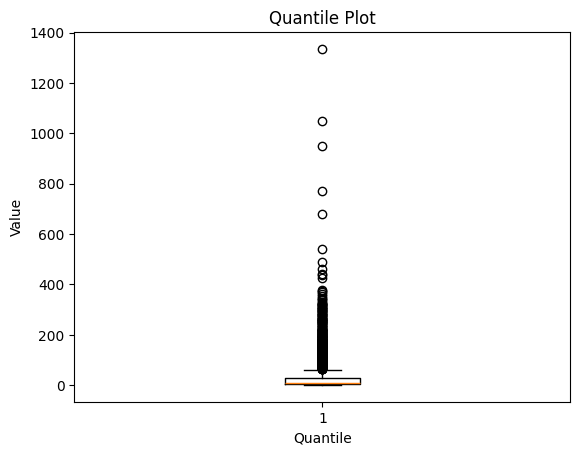

In [19]:
get_quantile_box(colexnr_array)

In [20]:
def get_quantile_violin(arr):
    # quantiles=np.quantile(arr, np.linspace(0,1,1335))
    # plt.plot(np.linspace(0,1,1335), quantiles)
    plt.violinplot(arr)
    plt.xlabel('Quantile')
    plt.ylabel('Value')
    plt.title('Quantile Plot')
    plt.show()

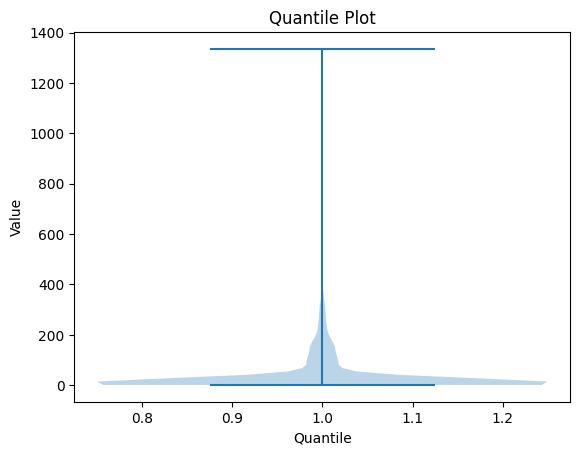

In [22]:
get_quantile_violin(colexnr_array)

In [24]:
lang2colex_nr = {lang: colex_nr for lang,colex_nr in glotto2colex_nr.items() if colex_nr>=3}

In [27]:
len(lang2colex_nr), len(glotto2colex_nr)

(1641, 1989)

In [31]:
langs_list = list(lang2colex_nr.keys())

In [38]:
df = pd.DataFrame(list(colex_dict.items()), columns=["Key", "Value"])

In [40]:
df[["Target", "Source"]] = pd.DataFrame(df["Key"].tolist(), index=df.index)

In [44]:
df = df.rename(columns={"Value":"Weight"})

In [45]:
df = df[["Target", "Source", "Weight"]]

In [49]:
df["Colex_target"] = df["Target"].apply(lambda x: lang2colex_nr.get(x, None))
df["Colex_source"] = df["Source"].apply(lambda x: lang2colex_nr.get(x, None))

In [51]:
df = df.dropna()

In [58]:
df.head(2) 

,Target,Source,Weight,Colex_target,Colex_source
0,chao1238,chen1267,3,8.0,9.0
1,chao1238,fuzh1239,4,8.0,7.0


In [54]:
from nltk.metrics import *
import pandas as pd

bm = BigramAssocMeasures

In [55]:
total_colex_nr = sum(list(lang2colex_nr.values()))
total_colex_nr

75842

In [59]:
def calculate_pmi(x,y,z):
    pmi = bm.pmi(x,(y,z), total_colex_nr)
    return pmi

In [60]:
df["pmi"] = df.apply(lambda row: calculate_pmi(row["Weight"], row["Colex_target"], row["Colex_source"]), axis=1)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_94032/4107798813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pmi"] = df.apply(lambda row: calculate_pmi(row["Weight"], row["Colex_target"], row["Colex_source"]), axis=1)


In [63]:
df.to_csv("../datasets/lang2lang/clics3.csv", index=False)

In [64]:
def get_boxplot(arr):
    # quantiles=np.quantile(arr, np.linspace(0,1,1335))
    # plt.plot(np.linspace(0,1,1335), quantiles)
    plt.boxplot(arr)
    plt.xlabel('PMI')
    plt.ylabel('Value')
    plt.title('Plot')
    plt.show()

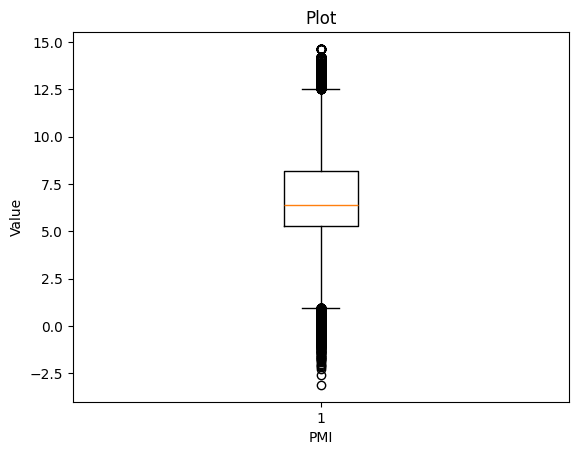

In [65]:
get_boxplot(df["pmi"].tolist())

In [2]:
df = pd.read_csv("../datasets/lang2lang/clics3.csv")

In [10]:
x_min=df["pmi"].min()
x_max=df["pmi"].max()

In [11]:
x_min, x_max

(np.float64(-3.10560529248788), np.float64(14.625746888318115))

In [12]:
def normalize(x):
    return (x - x_min) / (x_max - x_min)

In [72]:
df.head(2)

,Target,Source,Weight,Colex_target,Colex_source,pmi,pmi_norm
0,chao1238,chen1267,3,8.0,9.0,11.625747,0.830808
1,chao1238,fuzh1239,4,8.0,7.0,12.403354,0.874663


In [13]:
df["pmi_norm"] = df["pmi"].apply(normalize)

In [15]:
df.to_csv("../datasets/lang2lang/clics3.csv", index=False)